## Homework 1
Probability Review and Priors

Name: Hyun Suk Ryoo (Max Ryoo)

Computing ID: hr2ee

#### Question 1

(15) You are a data scientist and are choosing between three approaches, A, B,
and C, to a problem. With approach A you will spend a total of 4 days coding
and running an algorithm and it will not produce useful results. With approach
B you will spend a total of 3 days coding and running an algorithm and it will
not produce useful results. With approach C you will spend 1 day coding and
running an algorithm and it will produce useful results. You are equally likely to
choose among unselected options. What is the expected time in days for you to
obtain the results you are looking for, if you continue to select an unselected
option when you do not obtain useful results? What is the variance on this time?

#### Solution 1

For this problem you can think of the the possible choices as shown below.

Starting with A
- $A \rightarrow B \rightarrow C$
- $A \rightarrow C$

Starting with B
- $B \rightarrow A \rightarrow C$
- $B \rightarrow C$

Starting with C
- $C$

We always end at $C$ given the information that the algorithm will produce useful results. We are also given that the approaches $A$, $B$, and $C$ are all equally likely. First lets compute how many days each option (steps) will take

Starting with A
- $A \rightarrow B \rightarrow C = 4 \rightarrow 3 \rightarrow 1 = 8$ days
- $A \rightarrow C = 4 \rightarrow 1 = 5$ days

Starting with B
- $B \rightarrow A \rightarrow C = 3 \rightarrow 4 \rightarrow 1 = 8$ days
- $B \rightarrow C = 3 \rightarrow 1 = 4$ days

Starting with C
- $C \rightarrow 1$ days

Additionally we need to compute the probabilities that each approach will be. We are alos given the informatino taht we will choose among the unselected options. 

Starting with A
- $A \rightarrow B \rightarrow C = \frac{1}{3} \rightarrow \frac{1}{2} \rightarrow 1 = \frac{1}{6}$
- $A \rightarrow C = \frac{1}{3} \rightarrow \frac{1}{2} = \frac{1}{6}$

Starting with B
- $B \rightarrow A \rightarrow C = \frac{1}{3} \rightarrow \frac{1}{2} \rightarrow 1 = \frac{1}{6}$
- $B \rightarrow C =  \frac{1}{3} \rightarrow  \frac{1}{2} =  \frac{1}{6}$

Starting with C
- $C \rightarrow  \frac{1}{3}$

Given all the days and propbabilities we can find the expected number of days with the given probabilites.

$D(A_1)$ = The days for the first option starting with A

$P(A_1)$ = The probability for the first option starting with A

$E(X) = D(A_1) \cdot P(A_1) + D(A_2) \cdot P(A_2) + D(B_1) \cdot P(B_1) + D(B_2) \cdot P(B_2) + D(C_1) \cdot P(C_1)$

$E(X) = 8 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 8 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + 1 \cdot \frac{1}{3}$

$E(X) = \frac{8}{6} + \frac{5}{6} + \frac{8}{6} + \frac{4}{6} + \frac{2}{6}$

$E(X) = \frac{27}{6} = 4.5$

In order to find the variance let us map the data into data point values.

Expected Days = 4.5

Paths = [ABC, AC, BAC, BC, C]

Proabilities = [$\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$,$\frac{1}{3}$]

Actual Days = [8, 5, 8, 4, 1]

We can compute the variance of X to be the following formulation.

$VAR[X] = E[(X-E[X])^2] = \Sigma_{x\in dom(X)} (x-E[x])^2 p(x)$

In [1]:
probs = [1/6, 1/6, 1/6, 1/6, 1/3]
days = [8,5,8,4,1]
expected = 0
for i in range(len(days)):
    expected = probs[i]*days[i] + expected
expected

4.5

In [2]:
probs = [1/6, 1/6, 1/6, 1/6, 1/3]
actual = 8,5,8,4,1
var = 0
for i in range(len(actual)):
    var = var + (actual[i] - expected)**2 * probs[i]
var

8.25

From the computation above and code computation we can see that for this problem the expected time to produce results is **4.5** with a variance of **8.25**

#### Question 2
(15) Suppose if it is sunny or not in Charlottesville depends on the weather of
the last three days. Show how this can be modeled as a Markov chain.

#### Solution 2

Since the weather condition is dependent on the last three days the following options are possible for the three day sequence.

1. Sunny, Sunny, Sunny
2. Sunny, Sunny, Not Sunny
3. Sunny, Not Sunny, Sunny
4. Sunny, Not Sunny, Not Sunny
5. Not Sunny, Sunny, Sunny
6. Not Sunny, Sunny, Not Sunny
7. Not Sunny, Not Sunny, Sunny
8. Not Sunny, Not Sunny, Not Sunny

Let's say that our previous sequence of days for weather is S, S, S. 
The next day will be the following. _, S, S. The _ can either be S or N with assumption that S and N has a 0.5 probability of occurence for the most flexible setting. From this information we can make a transition Matrix like the following where the rows indicate what stage the weather is and rows represent what the new weather state will be.

| States  |  1 |  2 |  3 | 4  | 5| 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| 1  |  0.5 | 0   | 0  |  0 | 0.5| 0   | 0  | 0  |
| 2  |  0.5 | 0   | 0  |  0 | 0.5| 0   | 0  | 0  |
| 3  |  0   | 0.5 | 0  |  0 | 0  | 0.5 | 0  | 0  |
| 4  |  0   | 0.5 | 0  |  0 | 0  | 0.5 | 0  | 0  |
| 5  |  0   | 0   | 0.5|  0 | 0  | 0   | 0.5| 0  |
| 6  |  0   | 0   | 0.5|  0 | 0  | 0   | 0.5| 0  |
| 7  |  0   | 0   | 0  | 0.5|0   | 0   | 0  | 0.5|
| 8  |  0   | 0   | 0  | 0.5|0   | 0   | 0  | 0.5|

The table shown above will the the transition matrix that can be utilized for the transition matrix in a markov chain problem.

#### Question 3

(15) Assume a Gaussian distribution for observations, Xi, i = 1, . . . , N with
unknown mean, M, and known variance 5. Suppose the prior for M is Gaussian
with variance 10. How large a random sample must be taken (i.e., what is the
minimum value for N) to specify an interval having unit length of 1 such that
the probability that M lies in this interval is 0.95?

#### Solution 3

In [3]:
prior_variance = 10
known_variance = 5

We know that the interval of 0.95 is the following

$\mu_x \pm 2\sigma_x$

Given this we know that $4\sigma_x = 1 \rightarrow \sigma_x = \frac{1}{4}$

We also know that $Var[M|x, \sigma^2] = \frac{\sigma_0^2 \sigma^2}{\sigma^2 + N\sigma^2}$. which we can solve for $N$

$\sigma^2 + N\sigma^2 = \frac{\sigma_0^2 \sigma^2}{Var[M|x, \sigma^2]}$

$N\sigma^2 = \frac{\sigma_0^2 \sigma^2}{Var[M|x, \sigma^2]} - \sigma^2 $

$N = \frac{\sigma_0^2 \sigma^2}{Var[M|x, \sigma^2] \cdot \sigma^2} - \sigma^2 \cdot \frac{1}{\sigma^2} $

$N = \frac{10*5}{(\frac{1}{4})^2 \cdot 10} - 5 \cdot \frac{1}{10}$

$N = 5*16 - \frac{1}{2}$

In [4]:
5*16 - 0.5

79.5

In order to satisify that the interval of 0.95 will have a unit length of 1, with the given conditions we will need a sample size of **79.5 = 80**

#### Question 4

(15) You have started an online business selling books that are of interest to
your customers. A publisher has just given you a large book with photos from
famous 20th century photographers. You think this book will appeal to people
who have bought art books, history books and coffee table books. In an initial
offering of the new book you collect data on purchases of the new book and
combine these data with data from the past purchases (see ArtHistBooks.csv).

Use Bayesian analysis to give the posterior probabilities for purchases of art
books, history books and coffee table books, as well as, the separate probabilities
for purchases of the new book given each possible combination of prior
purchases of art books, history books and coffee table books. Do this by first
using beta priors with values of the hyperparameters that represent lack of prior
information. Then compute these probabilities again with beta priors that show
strong weighting for low likelihood of a book purchase. Compare your results.

#### Solution 4

In [5]:
import pandas as pd
books = pd.read_csv("datasets/ArtHistBooks.csv")
books

,ArtBooks,HistoryBooks,TableBooks,Purchase
0,0,0,1,0
1,0,1,0,0
2,0,0,0,0
3,1,0,1,0
4,1,1,1,0
...,...,...,...,...
995,1,1,0,1
996,0,1,0,0
997,1,0,1,0
998,1,1,0,0


In [6]:
a_lack = 1
b_lack = 1

a_prior = 10
b_prior = 200

In [7]:
k_art = len(books[books["ArtBooks"]>0])
k_history = len(books[books["HistoryBooks"]>0])
k_table = len(books[books["TableBooks"]>0])
n = len(books)
print(k_art, k_history, k_table, n)

301 543 380 1000


In [8]:
import numpy as np
x = np.linspace(0, 1, 100)[1:-1]

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import beta

def createPlot(priors, bookType):
    for a,b in priors:
        prior_prob = beta.pdf(x = x, a=a, b=b)
        plt.plot(x, prior_prob, label='a = {}, b= {}'.format(a, b))
    plt.legend()
    plt.xlabel("P(art)")
    plt.ylabel("Density")
    plt.title("Beta Distributions for " + bookType)
    plt.show()

def createPriors(type_addition, n):
    return [(a_lack, b_lack), (a_lack + type_addition, b_lack+n-type_addition),
            (a_prior, b_prior), (a_prior + type_addition, b_prior+n-type_addition)]

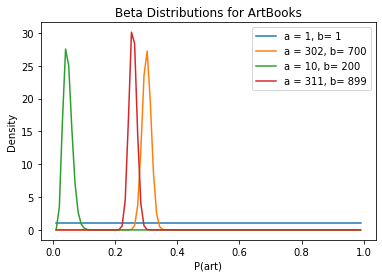

In [10]:
## For ArtBooks
artPriors = createPriors(k_art, len(books))
createPlot(artPriors,"ArtBooks")

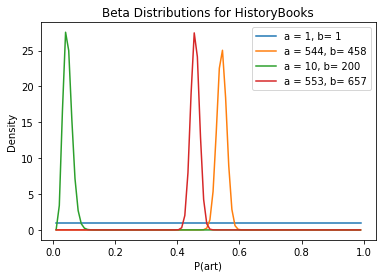

In [11]:
## For History Books
historyPriors = createPriors(k_history, len(books))
createPlot(historyPriors,"HistoryBooks")

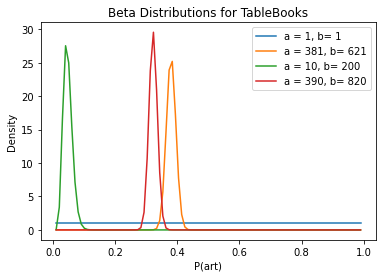

In [12]:
## For Table Books
tablePriors = createPriors(k_table, len(books))
createPlot(tablePriors,"TableBooks")

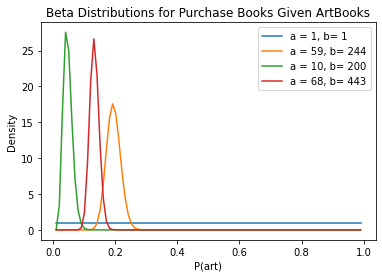

In [13]:
## For Purchase given ArtBook Purchases
n_art = len(books.query("ArtBooks>0"))
purchase_given_art = len(books.query("ArtBooks>0").query("Purchase>0"))
tablePriors = createPriors(purchase_given_art, n_art)
createPlot(tablePriors,"Purchase Books Given ArtBooks")

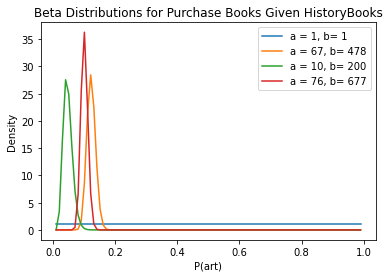

In [14]:
## For Purchase given HistoryBooks Purchases
n_history = len(books.query("HistoryBooks>0"))
purchase_given_history = len(books.query("HistoryBooks>0").query("Purchase>0"))
tablePriors = createPriors(purchase_given_history, n_history)
createPlot(tablePriors,"Purchase Books Given HistoryBooks")

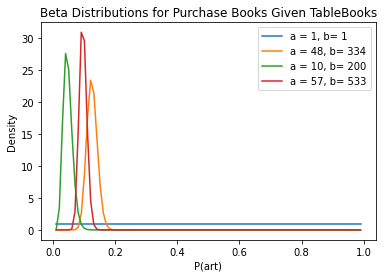

In [15]:
## For Purchase given TableBooks Purchases
n_table = len(books.query("TableBooks>0"))
purchase_given_table = len(books.query("TableBooks>0").query("Purchase>0"))
tablePriors = createPriors(purchase_given_table, n_table)
createPlot(tablePriors,"Purchase Books Given TableBooks")

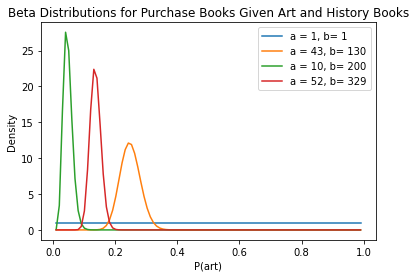

In [16]:
## For Purchase given Art and History Purchases
n_art_hist = len(books.query("ArtBooks>0").query("HistoryBooks>0"))
purchase_given_art_hist = len(books.query("ArtBooks>0").query("HistoryBooks>0").query("Purchase>0"))
tablePriors = createPriors(purchase_given_art_hist, n_art_hist)
createPlot(tablePriors,"Purchase Books Given Art and History Books")

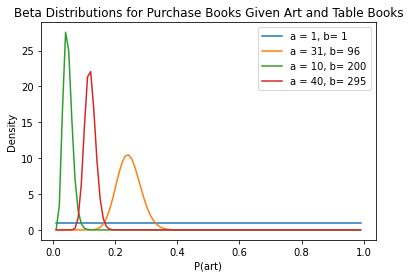

In [17]:
## For Purchase given Art and Table Purchases
n_art_table = len(books.query("ArtBooks>0").query("TableBooks>0"))
purchase_given_art_table = len(books.query("ArtBooks>0").query("TableBooks>0").query("Purchase>0"))
tablePriors = createPriors(purchase_given_art_table, n_art_table)
createPlot(tablePriors,"Purchase Books Given Art and Table Books")

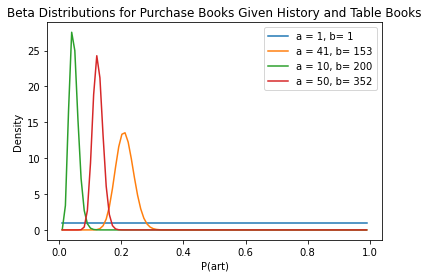

In [18]:
## For Purchase given History and Table Purchases
n_hist_table = len(books.query("HistoryBooks>0").query("TableBooks>0"))
purchase_given_hist_table = len(books.query("HistoryBooks>0").query("TableBooks>0").query("Purchase>0"))
tablePriors = createPriors(purchase_given_hist_table, n_hist_table)
createPlot(tablePriors,"Purchase Books Given History and Table Books")

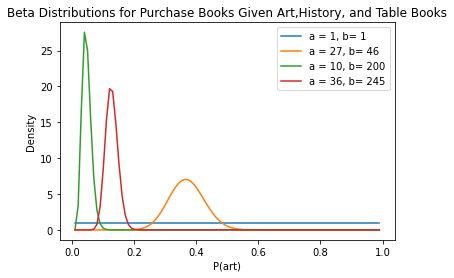

In [19]:
## For Purchase given Art and History and Table Purchases
n_all = len(books.query("ArtBooks>0").query("HistoryBooks>0").query("TableBooks>0"))
purchase_given_all = len(books.query("ArtBooks>0").query("HistoryBooks>0").query("TableBooks>0").query("Purchase>0"))
tablePriors = createPriors(purchase_given_all, n_all)
createPlot(tablePriors,"Purchase Books Given Art,History, and Table Books")

#### Question 5
(15) The data set CHDdata.csv contains cases of coronary heart disease (CHD)
and variables associated with the patient’s condition: systolic blood pressure, yearly tobacco use (in kg), low density lipoprotein (ldl),
adiposity, family history (0 or 1), type A personality score (typea), obesity (body
mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).

Perform a Bayesian analysis of these data that finds the posterior marginal
probability distributions for the means for the data of patients with and without
CHD. You should first standard scale (subtract the mean and divide by the
standard deviation) all the numeric variables (remove family history and do not
scale CHD). Then separate the data into two sets, one for patients with CHD
and one for patients without CHD.

Your priors for both groups should assume means of 0 for all variables and a
correlation of 0 between all pairs of variables. You should assume all variances
for the variables are 1. Use a prior alpha equal to one plus the number of
predictor variables. Compute and compare the Bayesian estimates for the
posterior means for each group.

For 5 extra credit points, compute the probability of observing a point at least
as extreme as the posterior mean of patients without coronary heart disease
under the posterior distribution for the patients with coronary heart disease.
Then compute the probability of observing a point at least as extreme as the
posterior mean of patients with coronary heart disease under the posterior
distribution for the patients without coronary heart disease.

#### Solution 5

In [33]:
cor_heart = pd.read_csv("datasets/CHDdata.csv")
cor_heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [34]:
## Standardize
cor_standard = cor_heart[["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]]
cor_standard = (cor_standard - cor_standard.mean())/cor_standard.std()
cor_standard["chd"] = cor_heart["chd"]
cor_standard

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,1
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,0
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1
...,...,...,...,...,...,...,...,...,...
457,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,0
458,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,1
459,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,0
460,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760,0


In [35]:
has_cor = cor_standard[cor_standard["chd"] == 1]
has_cor

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,1
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1
7,-1.186888,0.096745,-0.072589,-1.388915,0.906144,-0.696330,-0.421730,1.039361,1
...,...,...,...,...,...,...,...,...,...
453,-0.698996,-0.443205,1.197385,1.834446,-1.742178,1.294803,-0.696228,0.560203,1
454,0.374368,-0.652217,0.038474,0.335866,0.702427,0.490281,-0.360050,-0.261211,1
455,-0.503839,-0.303863,-0.922457,0.137940,-0.519876,-0.494606,1.240780,-1.082625,1
458,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,1


In [36]:
no_cor = cor_standard[cor_standard["chd"] == 0]
no_cor

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,0
5,-0.308682,0.558314,0.835225,1.388470,0.906144,1.121558,-0.118638,0.149496,0
6,0.179211,0.090213,-0.656873,-1.183278,0.600569,-1.242171,-0.589206,-0.329662,0
8,-1.186888,-0.791559,-0.439577,-0.772004,-0.418017,-0.281016,-0.594517,-0.945722,0
12,-0.991731,-0.791559,-1.381193,-1.973696,0.600569,-1.061806,-0.696228,-1.767136,0
...,...,...,...,...,...,...,...,...,...
452,0.764682,0.412441,-0.743792,0.437399,0.804286,0.025129,1.051654,-0.055857,0
456,1.545310,-0.704470,-0.304371,2.140331,0.294993,1.674519,-0.612081,0.970910,0
457,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,0
459,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,0


In [37]:
import numpy as np
posterior_data_has_cor = []
for i in has_cor.columns:
    if i != "chd":
        n = len(has_cor)
        # when we use conjugate priors, we only need to use Python like a simple calculator
        xbar = np.average(has_cor[i])
        tau0 = 1000 # chosen hyperparameter 
        ## Pick a high tau0 because we know that the variance should be 0, which means a high tau0
        mu0 = 0  # chosen hyperparameter
        tau = 1 # assumed known
        # "getting" the posterior is simply invoking the formula
        posterior_mean = xbar*(n*tau/(tau0 + n*tau )) + mu0*(tau0/(tau0 + n*tau ))
        posterior_precision = tau0 + n*tau 
        posterior_variance = 1/posterior_precision
        posterior_data_has_cor.append([i, posterior_mean, posterior_precision, posterior_variance])

posterior_has_cor = pd.DataFrame(posterior_data_has_cor)
posterior_has_cor.columns = ['Variable', 'Posterior Mean', 'Posterior Percision', 'Posterior Variance']
posterior_has_cor

,Variable,Posterior Mean,Posterior Percision,Posterior Variance
0,sbp,0.036411,1160,0.000862
1,tobacco,0.056734,1160,0.000862
2,ldl,0.049794,1160,0.000862
3,adiposity,0.048103,1160,0.000862
4,typea,0.019527,1160,0.000862
5,obesity,0.018947,1160,0.000862
6,alcohol,0.011837,1160,0.000862
7,age,0.070601,1160,0.000862


In [38]:
import numpy as np
posterior_data_no_cor = []
for i in no_cor.columns:
    if i != "chd":
        n = len(no_cor)
        # when we use conjugate priors, we only need to use Python like a simple calculator
        xbar = np.average(no_cor[i])
        tau0 = 1000 # chosen hyperparameter 
        ## Pick a high tau0 because we know that the variance should be 0, which means a high tau0
        mu0 = 0  # chosen hyperparameter
        tau = 1 # assumed known
        # "getting" the posterior is simply invoking the formula
        posterior_mean = xbar*(n*tau/(tau0 + n*tau )) + mu0*(tau0/(tau0 + n*tau ))
        posterior_precision = tau0 + n*tau 
        posterior_variance = 1/posterior_precision
        posterior_data_no_cor.append([i, posterior_mean, posterior_precision, posterior_variance])

posterior_no_cor = pd.DataFrame(posterior_data_no_cor)
posterior_no_cor.columns = ['Variable', 'Posterior Mean', 'Posterior Percision', 'Posterior Variance']
posterior_no_cor

,Variable,Posterior Mean,Posterior Percision,Posterior Variance
0,sbp,-0.032440,1302,0.000768
1,tobacco,-0.050547,1302,0.000768
2,ldl,-0.044363,1302,0.000768
3,adiposity,-0.042857,1302,0.000768
4,typea,-0.017397,1302,0.000768
5,obesity,-0.016881,1302,0.000768
6,alcohol,-0.010546,1302,0.000768
7,age,-0.062901,1302,0.000768


From the posterior means, percision, and variance for the data with heart disease we can see that all the posterior means were positive while for the data with no heart disease the means were all negative. From our common medical knowledge we know that if a person has high values for the variables (indiciating poor health) that person may have heart disease. This is represented by positive posterior mean values of the means from the data with heart disease and negative posterior mean values of the means from the data without heart disease. 

#### Question 6

(10) For each of the following types of distributions, state the support type
(single or multivariable and discrete or continuous), the formula for the PMF or
PDF, the parameters, the support, the mean, and some typical uses of the
distribution. You may use whatever source(s) you want, including for example
Wikipedia.

#### Solution A 

**Bernoulli Distribution**

- Support Type: Single, Discrete
- Formula for PMF or PDF: PMF = $P(k|p) = p^k (1-p)^{1-k}$
- Parameters:  $\begin{cases}
    p \in [0,1] & \text{probability of success} \\
    q=1-p &
  \end{cases}$
- Support: $k \in \{0,1\}$
- Mean: $p$
- Typical Uses: An example of this distribution is flipping a coin. This distribution is used to model any random variable that has two possible outcomes (success, failure)

Sources:
- https://en.wikipedia.org/wiki/Bernoulli_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution B

**Binomial Distribution**

- Support Type: Single, Discrete
- Formula for PMF or PDF: PMF = ${n \choose k}p^k(1-p)^{n-k}$
- Parameters: $\begin{cases}
    p \in [0,1] & \text{probability of success} \\
    n \in \{1,2,3,...\} & \text{# trials} \\
    q=1-p &
  \end{cases}$
- Support: $k \in \{0,1,...,n\}$
- Mean: $np$
- Typical Uses: The binomial distribution is to model the number of success from multiple independent bernouli trials, such as the number of heads in multiple coin flips. 

Sources:
- https://en.wikipedia.org/wiki/Binomial_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution C

**Poisson Distribution**

- Support Type: Single, Discrete
- Formula for PMF or PDF: PMF = $\frac{\lambda^k e^{-\lambda}}{k!}$
- Parameters: $\lambda \in (0, \infty)$
- Support: $k \in \mathbb{N}_0$ (Natural numbers starting from 0)
- Mean: $\lambda$
- Typical Uses: A famous example for this distribution is the number of accidents on a stretch of road per month. This distribution is used to model the number of occurences over a certain fixed amount of time. However, the conditions must be that the events are independent and that there is a fixed mean rate. 

Sources:
- https://en.wikipedia.org/wiki/Poisson_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution D

**Uniform Distribution**

- Support Type: Single, Continous
- Formula for PMF or PDF: PDF = $  f(x|a,b) = \begin{cases}
    \frac{1}{b-a} & \text{if $x\in [a,b]$} \\
    0 & \text{otherwise}
  \end{cases}$
- Parameters: $-\infty < a < b < \infty$
- Support: $x \in [a,b]$
- Mean: $\frac{b-a}{2}$
- Typical Uses: This distribution is used to represent when a random variable has values that are equally possible. For example, spinning a spinner which will come to rest at any angle in $[0, 2\pi]$

Sources:
- https://en.wikipedia.org/wiki/Continuous_uniform_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution E

**Beta Distribution**

- Support Type: Single, Continous
- Formula for PMF or PDF: PDF = $\begin{cases}
    f(x|\alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta - 1}}{B(\alpha, \beta)} & \text{where} \\
    B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}
  \end{cases}$
- Parameters: $\begin{cases}
    \alpha \in (0, \infty) \\
    \beta \in (0, \infty)
  \end{cases}$
- Support: $x \in [0,1]$ (possibly excluding endpoints)
- Mean: $\frac{\alpha}{\alpha + \beta}$
- Typical Uses: This distribution is used as a prior probability distribution in Bayesian methods. It is used to model a random variable on an interval of finite length.

Sources:
- https://en.wikipedia.org/wiki/Beta_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution F

**Gamma Distribution**

- Support Type: Single, Continous
- Formula for PMF or PDF: PDF = $f(x|k, \theta) = \frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}}$
- Parameters: $\begin{cases}
    k \in (0, \infty) \\
    \theta \in (0, \infty)
  \end{cases}$
- Support: $x \in (0, \infty)$ (possibly excluding endpoints)
- Mean: $k\theta$
- Typical Uses: A typical example is rainfall accumulated in a reservoir. The Gamma distribution is used to model accumulation over a unit of time. 

Sources:
- https://en.wikipedia.org/wiki/Gamma_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution G

**Gaussian Distribution**

- Support Type: Single, Continous
- Formula for PMF or PDF: PDF = $f(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} exp(-\frac{1}{2}(\frac{x - \mu}{\sigma})^2)$
- Parameters: $\begin{cases}
    \mu \in \mathbb{R} & \text{mean} \\
    \sigma > 0 & \text{standard deviation}
  \end{cases}$
- Support: $x \in \mathbb{R}$
- Mean: $\mu$
- Typical Uses: This distribution is the most commenly used for biological and physical measurments. 

Sources: 
- https://en.wikipedia.org/wiki/Normal_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution H

**t Distribution**

- Support Type: Single, Continous
- Formula for PMF or PDF: PDF = $f(x|\nu, \mu, \sigma) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}
{\sqrt{\nu\pi}\hat{\sigma}^2\Gamma(\frac{\nu}{2})}
(1 + \frac{1}{\nu}\frac{(x-\mu)^2}{\hat{\sigma}^2})^{-\frac{\nu + 1}{2}}
$
- Parameters: $\begin{cases}
    \nu > 0 & \text{(d.o.f)} \\
    \mu \in \mathbb{R} & \text{(location)} \\
    \sigma > 0 & \text{(scale)}
  \end{cases}$
- Support: $x \in \mathbb{R}$
- Mean: $\begin{cases}
    \mu & \text{if } \nu > 0 \\
    \text{else} & undef.
  \end{cases}$
- Typical Uses: This distribution is used when a set of samples is used to assume to have a normal distribution. This distribution is similar to normal distribution, but its shape does differ a slight bit.

Sources:
- https://en.wikipedia.org/wiki/Student%27s_t-distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution I

**Cauchy Distribution**

- Support Type: Single, Continous
- Formula for PMF or PDF: PDF = $\frac{1}{\pi\gamma \left[1 + (\frac{x-x_0}{\gamma})^2\right]}$
- Parameters: $\begin{cases}
    x_0 \in \mathbb{R} & \text{(location)} \\
    \gamma > 0 & \text{(location)} \\
  \end{cases}$
- Support: $x \in (-\infty, \infty)$
- Mean: $undefined$
- Typical Uses: The typical use case for the Cauchy distribution is for the use as the canonical example of a pathological distribution.

Sources:
- https://en.wikipedia.org/wiki/Cauchy_distribution

#### Solution J

**Multinomial Distribution**

- Support Type: Single, Discrete
- Formula for PMF or PDF: PMF = $\frac{n!}{x_1! \cdot \cdot \cdot x_k!}p_1^{x_1} \cdot \cdot \cdot p_k^{x_k}$
- Parameters: $\begin{cases}
    n > 0 & \text{(number of trials)} \\
    k > 0  & \text{(numbeer of mutually exclusive events (integer))} \\
    p_1, ..., p_k & \text{event probabilities) } (\Sigma p_i = 1)
  \end{cases}$
- Support: $\begin{cases}
   x_1 \in \{0,...,n\} \\
    i \in \{1, ..., k\} \\
    \text{with } \Sigma_i x_i=n
  \end{cases}$
- Mean: $E(X_i) = np_i$
- Typical Uses: This distribution is a generalization of the binomial distribution.

Sources:
- https://en.wikipedia.org/wiki/Multinomial_distribution

#### Solution K

**Dirichlet Distribution**

- Support Type: Multivariate, Continous
- Formula for PMF or PDF: PDF = $\begin{cases}
    \frac{1}{b-a} & \text{if $x\in [a,b]$} \\
    0 & \text{otherwise}
  \end{cases}$
- Parameters: $\begin{cases}
    \mu \in \mathbb{R} & \text{(mean)} \\
    \Sigma & \text{(covariance matrix)} \\
  \end{cases}$
- Support: $x \in [a,b]$
- Mean: $\frac{b-a}{2}$
- Typical Uses: This distribution is the multivariate generalizatino of the beta distribution. It is commonly used as prior distributions in Bayesian statistics. Also, the Dirichlet distribution is the conjugate prior of the categorical distribution and multinomial distribution.

Sources:
- https://en.wikipedia.org/wiki/Dirichlet_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution L

**Multivariate Gaussian Distribution**

- Support Type: Multivariate, Continous
- Formula for PMF or PDF: PDF = $\frac{1}{(2\pi)^{-\frac{k}{2}} |\Sigma|^{-\frac{1}{2}}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$
- Parameters: $\begin{cases}
    \mu \in \mathbb{R}^k & \text{(mean)} \\
    \Sigma & \text{(covariance matrix)} \\
  \end{cases}$
- Support: $x \in \mathbb{R}^k$
- Mean: $\mu$
- Typical Uses: This distribution is the multivariate generalization of the normal distribution. The distribution is used to describe a set of corrleated real-valued random variables that cluster around a mean value. 

Sources:
- https://en.wikipedia.org/wiki/Multivariate_normal_distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution M

**Multivariate t Distribution**

- Support Type: Multivariate, Continous
- Formula for PMF or PDF: PDF = $f(x|\nu, \mu, \Sigma) = \frac{\Gamma(\nu+k)}{\Gamma(\frac{\nu}{2})(\nu\pi)^{\frac{k}{2}}|\Sigma|^{\frac{1}{2}}} [1 + \frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)]^{-\frac{\nu + k}{2}}$
- Parameters: $\begin{cases}
    \mu \in \mathbb{R}^k & \text{(mean)} \\
    \Sigma & \text{(covariance matrix)} \\
  \end{cases}$
- Support: $x \in \mathbb{R}^k$
- Mean: $\mu$
- Typical Uses: This distribution is the multivariate generalization of the t distribution.

Sources:
- https://en.wikipedia.org/wiki/Multivariate_t-distribution
- https://github.com/wbasener/BayesianML/blob/main/BasenerBrownBML_1_18_2021.pdf

#### Solution N

**Wishart Distribution**

- Support Type: Multivariate, Continous
- Formula for PMF or PDF: PDF = $\begin{cases}
    f_X(x) = \frac{|x|^{\frac{n-p-1}{2}}e^{-\frac{-tr(V^{-1}x)}{2}}}{2^{\frac{np}{2}}|V|^{\frac{n}{2}} \Gamma_p (\frac{n}{2})} \\
    \Gamma_p \text{ is the multivariate gamma function} \\
    tr \text{ is the trace function}
  \end{cases}$
- Parameters: $\begin{cases}
    n > p-1 & \text{(degrees of freedom)} \\
    V > 0 & \text{(scale matrix)} (p \times p \text{ pos. def}) \\
  \end{cases}$
- Support: $X(p \times p)$ positive definite matrix
- Mean: $E[X] = nV$
- Typical Uses: This distribution is the multivariate generalization of the gamma distribution. The wishart distribution is the conjugate prior of the inverse covariance-matrix of a multivariate-normal random-vector

Sources:
- https://en.wikipedia.org/wiki/Wishart_distribution

#### Question 7

(15) Using the Python Notebook https://www.kaggle.com/billbasener/pt2-probabilities-likelihoods-and-bayes-theorem, complete the challenge question from Section 6: Modify the code from Section 5 to and add the ability to use the posterior from conjugate prior function to output the posterior probability parameters given parameters and for a Gaussian Likelihood with known variance σ2, and use your modified function to create the Prior, Likelihood, Posterior plots as in Section 5 of the notebook.

#### Solution 7

In [29]:
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import norm

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
    
    elif kwargs['Likelihood_Dist_Type'] == 'Gaussian_Known_Variance':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        mu = kwargs['mu'] # This is the number of Bernoili trials.
        var = kwargs['var'] # This is the number of 'successes'.
        n = kwargs['n'] # This is the parameter alpha for the prior Beta distribution
        prior_mu = kwargs['prior_mu'] # This is the parameter beta for the prior Beta distribution
        prior_var = kwargs['prior_var'] # This is the parameter beta for the prior Beta distribution
        

        Likelihood = -1
        Prior = -1
        Posterior = -1
        
        return [Prior, Likelihood, Posterior]
    
    else:
        print('Distribution type not supported.') 
        return -1, -1, -1

In [30]:
x = np.arange(-100, 200, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, n=2000, prior_mu=0, prior_var=1)    

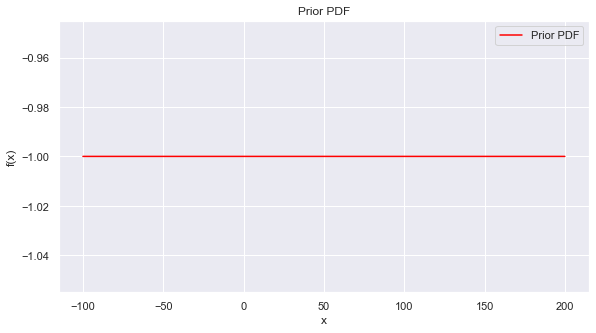

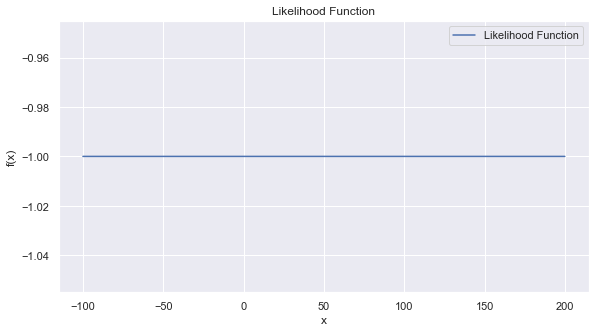

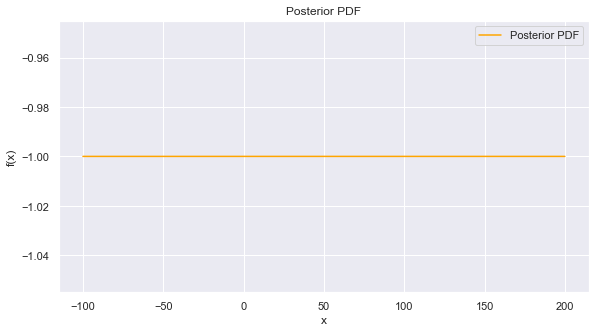

In [32]:
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(9.5,5)})

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()